In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_human=pd.read_csv('Human Resources.csv')
data_human

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572
...,...,...,...,...,...,...
102,Uzbekistan,2016,2.612,9.214,NaN,0.090
103,Vanuatu,2016,0.378,4.535,0.378,0.756
104,Yemen,2016,0.201,0.323,0.056,0.409
105,Zambia,2016,0.056,1.429,0.019,0.031


In [3]:
set(data_human.Year)

{2016}

In [4]:
data_human.isnull().sum()

Country            0
Year               0
Psychiatrists      3
Nurses            16
Social_workers    39
Psychologists     23
dtype: int64

In [5]:
data_human.sort_values(by=['Psychiatrists'],inplace=True,ascending=False)
data_human.head(15)

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
69,Norway,2016,48.040,NaN,NaN,73.522
58,Monaco,2016,31.326,83.536,102.592,53.515
67,New Zealand,2016,28.540,75.132,NaN,NaN
73,Poland,2016,24.176,30.916,NaN,16.346
4,Argentina,2016,21.705,NaN,NaN,222.572
89,Sweden,2016,20.863,50.566,NaN,NaN
53,Lithuania,2016,18.452,49.763,NaN,15.860
31,Estonia,2016,16.188,23.484,0.532,6.460
101,Uruguay,2016,14.134,NaN,NaN,NaN
8,Belarus,2016,13.504,NaN,NaN,5.514


In [6]:
data_human.drop(['Year','Social_workers'],axis=1,inplace=True)
data_human

,Country,Psychiatrists,Nurses,Psychologists
69,Norway,48.040,NaN,73.522
58,Monaco,31.326,83.536,53.515
67,New Zealand,28.540,75.132,NaN
73,Poland,24.176,30.916,16.346
4,Argentina,21.705,NaN,222.572
...,...,...,...,...
68,Niger,0.014,0.126,0.019
17,Chad,0.007,0.021,NaN
30,Eritrea,NaN,2.166,0.083
41,Guinea-Bissau,NaN,0.791,0.113


In [7]:
data_human.interpolate(method='linear',inplace=True)
data_human

C:\Users\SLAYER\AppData\Local\Temp\ipykernel_10492\2209892503.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_human.interpolate(method='linear',inplace=True)


,Country,Psychiatrists,Nurses,Psychologists
69,Norway,48.040,NaN,73.5220
58,Monaco,31.326,83.536,53.5150
67,New Zealand,28.540,75.132,34.9305
73,Poland,24.176,30.916,16.3460
4,Argentina,21.705,40.741,222.5720
...,...,...,...,...
68,Niger,0.014,0.126,0.0190
17,Chad,0.007,0.021,0.0510
30,Eritrea,0.007,2.166,0.0830
41,Guinea-Bissau,0.007,0.791,0.1130


In [8]:
data_human.isnull().sum()

Country          0
Psychiatrists    0
Nurses           1
Psychologists    0
dtype: int64

In [9]:
data_human.fillna(method='bfill',inplace=True)
data_human

C:\Users\SLAYER\AppData\Local\Temp\ipykernel_10492\3501108600.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_human.fillna(method='bfill',inplace=True)


,Country,Psychiatrists,Nurses,Psychologists
69,Norway,48.040,83.536,73.5220
58,Monaco,31.326,83.536,53.5150
67,New Zealand,28.540,75.132,34.9305
73,Poland,24.176,30.916,16.3460
4,Argentina,21.705,40.741,222.5720
...,...,...,...,...
68,Niger,0.014,0.126,0.0190
17,Chad,0.007,0.021,0.0510
30,Eritrea,0.007,2.166,0.0830
41,Guinea-Bissau,0.007,0.791,0.1130


In [10]:
data_human.isnull().sum()

Country          0
Psychiatrists    0
Nurses           0
Psychologists    0
dtype: int64

In [11]:
data_human.drop_duplicates(inplace=True)
data_human.shape

(107, 4)

In [12]:
data_age = pd.read_csv('Crude suicide rates.csv')
data_age.replace([" Both sexes", " Male", " Female"], ["Both sexes", "Male", "Female"], inplace=True)
both_sexes = data_age[data_age['Sex'] == 'Both sexes']
both_sexes.rename(index=both_sexes.Country,inplace=True)

both_sexes['Mean of all ages'] = (
        both_sexes[' 80_above'] + both_sexes[' 70to79'] + both_sexes[' 60to69 '] + both_sexes[' 50to59 '] +
        both_sexes[' 40to49'] + both_sexes[' 30to39'] + both_sexes[' 20to29'] + both_sexes[' 10to19'])/8
Suicide_Rates=both_sexes[['Country','Mean of all ages']]
Suicide_Rates

C:\Users\SLAYER\AppData\Local\Temp\ipykernel_10492\394489627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_sexes.rename(index=both_sexes.Country,inplace=True)
C:\Users\SLAYER\AppData\Local\Temp\ipykernel_10492\394489627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_sexes['Mean of all ages'] = (


,Country,Mean of all ages
Afghanistan,Afghanistan,11.6500
Albania,Albania,8.1375
Algeria,Algeria,4.8500
Angola,Angola,20.7250
Antigua and Barbuda,Antigua and Barbuda,1.0125
...,...,...
Venezuela (Bolivarian Republic of),Venezuela (Bolivarian Republic of),5.4125
Viet Nam,Viet Nam,11.1750
Yemen,Yemen,11.5125
Zambia,Zambia,25.6125


In [13]:
all_data=data_human.merge(Suicide_Rates,how='inner',on='Country')
all_data.isnull().sum()

Country             0
Psychiatrists       0
Nurses              0
Psychologists       0
Mean of all ages    0
dtype: int64

In [14]:
all_data

,Country,Psychiatrists,Nurses,Psychologists,Mean of all ages
0,Norway,48.040,83.536,73.5220,15.2250
1,New Zealand,28.540,75.132,34.9305,14.1750
2,Poland,24.176,30.916,16.3460,17.1875
3,Argentina,21.705,40.741,222.5720,11.4250
4,Sweden,20.863,50.566,119.2160,18.7500
...,...,...,...,...,...
99,South Sudan,0.025,0.017,0.2610,13.8750
100,Niger,0.014,0.126,0.0190,21.4500
101,Chad,0.007,0.021,0.0510,30.2500
102,Eritrea,0.007,2.166,0.0830,30.9250


In [15]:
all_data.rename(index=all_data.Country,inplace=True)
all_data.drop('Country',axis=1,inplace=True)
all_data

,Psychiatrists,Nurses,Psychologists,Mean of all ages
Norway,48.040,83.536,73.5220,15.2250
New Zealand,28.540,75.132,34.9305,14.1750
Poland,24.176,30.916,16.3460,17.1875
Argentina,21.705,40.741,222.5720,11.4250
Sweden,20.863,50.566,119.2160,18.7500
...,...,...,...,...
South Sudan,0.025,0.017,0.2610,13.8750
Niger,0.014,0.126,0.0190,21.4500
Chad,0.007,0.021,0.0510,30.2500
Eritrea,0.007,2.166,0.0830,30.9250


In [16]:
from sklearn.preprocessing import minmax_scale

In [17]:
minmax_data=minmax_scale(all_data,feature_range=(0,5))
scale_df=pd.DataFrame(minmax_data,index=all_data.index,columns=all_data.columns)
scale_df

,Psychiatrists,Nurses,Psychologists,Mean of all ages
Norway,5.000000,2.779882,1.651645,1.426242
New Zealand,2.970146,2.500216,0.784701,1.320873
Poland,2.515875,1.028812,0.367207,1.623181
Argentina,2.258656,1.355765,5.000000,1.044907
Sweden,2.171007,1.682718,2.678145,1.779980
...,...,...,...,...
South Sudan,0.001874,0.000566,0.005863,1.290768
Niger,0.000729,0.004193,0.000427,2.050928
Chad,0.000000,0.000699,0.001146,2.934019
Eritrea,0.000000,0.072079,0.001865,3.001756


In [18]:
scale_df.sort_values(by=['Mean of all ages'],inplace=True)
scale_df

,Psychiatrists,Nurses,Psychologists,Mean of all ages
Antigua and Barbuda,0.103471,0.233110,0.011558,0.000000
Syrian Arab Republic,0.037578,0.035541,0.023992,0.287255
United Arab Emirates,0.170924,0.145423,0.017185,0.291019
Guatemala,0.050486,0.035640,1.036676,0.293527
Azerbaijan,0.358608,0.223526,0.026171,0.314852
...,...,...,...,...
Liberia,0.003852,0.213010,0.004616,3.726794
Togo,0.004892,0.008985,0.009076,3.825891
Côte d'Ivoire,0.012804,0.012679,0.002007,4.632464
Uganda,0.007807,0.074608,0.000831,4.687657


In [19]:
all_data_des=scale_df.describe()
all_data_des

,Psychiatrists,Nurses,Psychologists,Mean of all ages
count,104.000000,104.000000,104.000000,104.000000
mean,0.414021,0.406015,0.222954,1.570171
std,0.747746,0.729022,0.679982,1.040752
min,0.000000,0.000000,0.000000,0.000000
25%,0.020168,0.028411,0.005467,0.782740
50%,0.116534,0.141347,0.026913,1.341570
75%,0.418879,0.375950,0.090614,2.025213
max,5.000000,5.000000,5.000000,5.000000


In [20]:
all_top10=scale_df.sort_values(by=['Mean of all ages'],ascending=False).head(10)
all_top10.loc['Global average']=all_data_des.loc['mean']
all_top10

,Psychiatrists,Nurses,Psychologists,Mean of all ages
Zimbabwe,0.009160,0.116006,0.001280,5.000000
Uganda,0.007807,0.074608,0.000831,4.687657
Côte d'Ivoire,0.012804,0.012679,0.002007,4.632464
Togo,0.004892,0.008985,0.009076,3.825891
Liberia,0.003852,0.213010,0.004616,3.726794
Guyana,0.094102,0.182594,0.000000,3.633969
Republic of Korea,0.602294,0.454639,0.035741,3.575013
Lithuania,1.920034,1.655996,0.356289,3.455845
Burkina Faso,0.003331,0.021131,0.000494,3.356749
Suriname,0.130952,0.553407,0.012176,3.332915


In [21]:
all_tail10=scale_df.sort_values(by=['Mean of all ages'],ascending=False).tail(10)
all_tail10.loc['Global average']=all_data_des.loc['mean']
all_tail10

,Psychiatrists,Nurses,Psychologists,Mean of all ages
Tajikistan,0.144172,0.049817,0.035348,0.484195
Morocco,0.086607,0.081564,0.012917,0.480432
Greece,0.603335,0.424223,0.197262,0.445309
Sao Tome and Principe,0.052464,0.153144,0.068922,0.442800
Saudi Arabia,0.136781,0.354740,0.045693,0.421475
Azerbaijan,0.358608,0.223526,0.026171,0.314852
Guatemala,0.050486,0.035640,1.036676,0.293527
United Arab Emirates,0.170924,0.145423,0.017185,0.291019
Syrian Arab Republic,0.037578,0.035541,0.023992,0.287255
Antigua and Barbuda,0.103471,0.233110,0.011558,0.000000


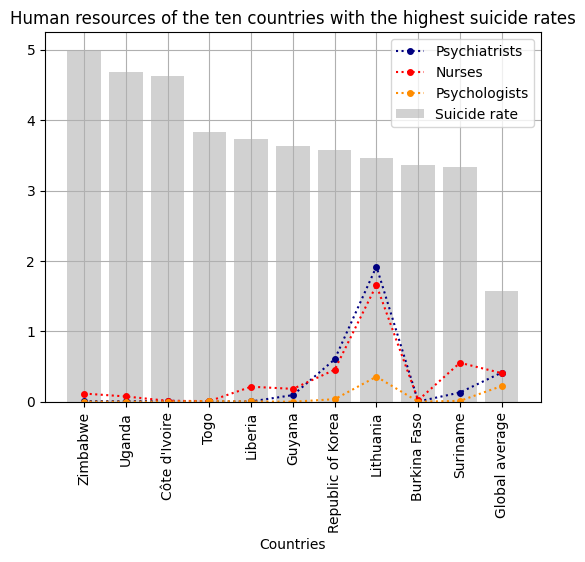

In [22]:
plt.plot(all_top10.index,all_top10['Psychiatrists'], ls='dotted', marker='.', mew=2,label='Psychiatrists',color='navy')
plt.plot(all_top10.index,all_top10['Nurses'], ls='dotted', marker='.', mew=2,label='Nurses',color='red')
plt.plot(all_top10.index,all_top10['Psychologists'], ls='dotted', marker='.', mew=2,label='Psychologists',color='darkorange')
plt.bar(all_top10.index,all_top10['Mean of all ages'],label='Suicide rate',alpha=0.3,color='dimgray')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.title('Human resources of the ten countries with the highest suicide rates')
plt.xlabel('Countries')
plt.show()

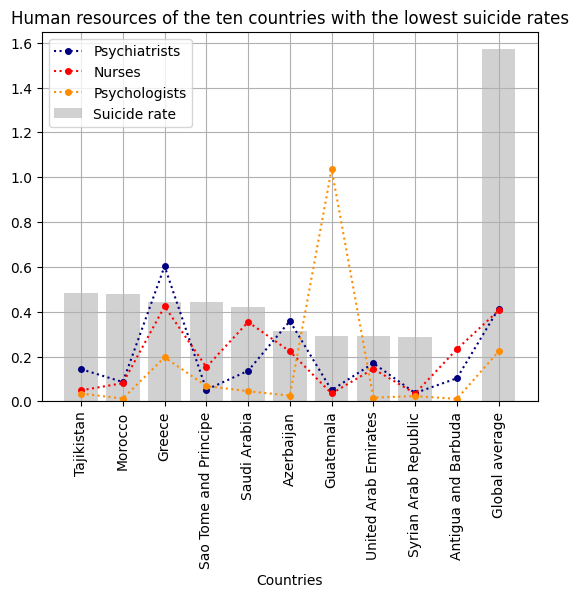

In [23]:
plt.plot(all_tail10.index,all_tail10['Psychiatrists'], ls='dotted', marker='.', mew=2,label='Psychiatrists',color='navy')
plt.plot(all_tail10.index,all_tail10['Nurses'], ls='dotted', marker='.', mew=2,label='Nurses',color='red')
plt.plot(all_tail10.index,all_tail10['Psychologists'], ls='dotted', marker='.', mew=2,label='Psychologists',color='darkorange')
plt.bar(all_tail10.index,all_tail10['Mean of all ages'],label='Suicide rate',alpha=0.3,color='dimgray')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.title('Human resources of the ten countries with the lowest suicide rates')
plt.xlabel('Countries')
plt.show()